# MNIST Classification and Tensorflow
Acknowledgement: **Learning TensorFlow: A Guide to Building Deep Learning Systems** 1st Edition
* by **Tom Hope** (Author), **Yehezkel S. Resheff** (Author), **Itay Lieder** (Author) 
* **O'Reilly Publishing**
* ISBN-13: **978-1491978511**
* Excerpts from **Chapter 4** – **Convolutional Neural Networks**
* Full code available on github: https://github.com/Hezi-Resheff/Oreilly-Learning-TensorFlow/blob/master/04__convolutional_neural_networks/mnist_cnn.py
* Note: You may find little differences between the code outputs in the book and in this Jupyter notebook: In addiiton to the differences acknowledged by the authors, The intestion of this notebook is to convey overall structure of a CNN and how it can be sinmply implemented in Tensorflow within a Data Science Experience Environment.

# About This Lab
The purpose of this lab is to provide a simple introduction to Deep Learning and Tensorflow with a minimum of technical nuance.
We have chosen a small dataset, MNIST, to keep the training execution time to a minimum but still give a sense of the required steps in constructing and executing a tensorflow graph to do something useful.


# About MNIST
The MNIST (Modified National Institute Standards and Technology) database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Four files are available on this site:

* train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 
* train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 
* t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 
* t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

# Visualization of CNN Architecture Used

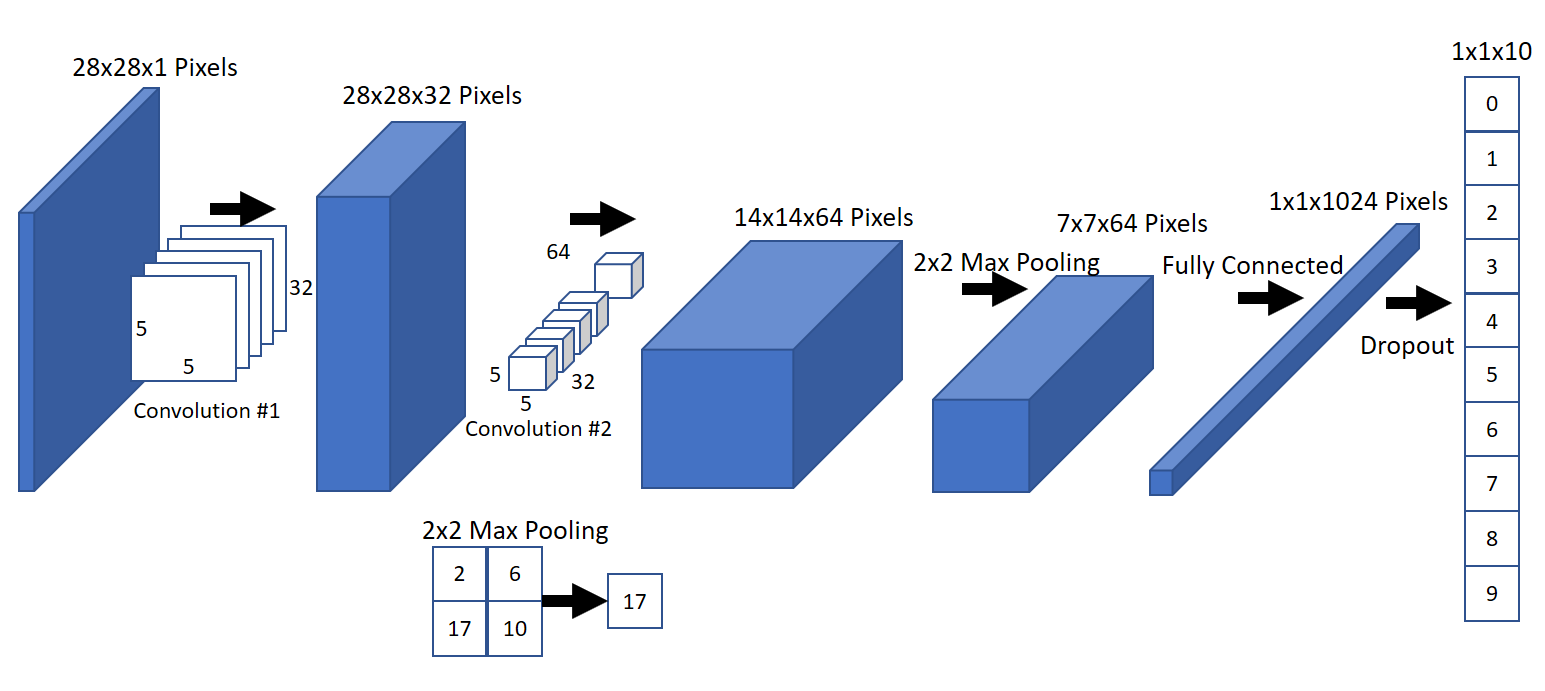

### Import Libraries and Load the data 
Here we use a pre-built library from tensorflow load the mnist data, and read it into a tensor flow dataset.  At its core its a set of images stored as a numpy array.  Tensorflow was developed to work with numpy arrays out of the box for a number of different apis.  

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_DIR = '~/tmp/data'
model_path = "/tmp/my_mnist_model.ckpt"

from layers import *

mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

Extracting ~/tmp/data/train-images-idx3-ubyte.gz
Extracting ~/tmp/data/train-labels-idx1-ubyte.gz
Extracting ~/tmp/data/t10k-images-idx3-ubyte.gz
Extracting ~/tmp/data/t10k-labels-idx1-ubyte.gz


### Explore mnist data structure

Hint : In jupyter, you can use tab completion to making typing easier.  You can also use it to quickly explore data structures.  See if you can try this on the mnist dataset to get a feel for the data structrue. 
    
    Type 'mnist.' + tab to get started
    
Exercise : Find the where images are stored in the mnist data structure, and print the type.  
    
 <div class="panel-group" id="accordion-11">

  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse1-11">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-11" class="panel-collapse collapse">
      <div class="panel-body">once you find the images, use the type() function </div>
    </div>
  </div>
  
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse1-12">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse1-12" class="panel-collapse collapse">
      <div class="panel-body">type(mnist.test.images) </div>
    </div>
  </div>
  
</div>     
    
    
    

# Define the computational graph in tensorflow

During this lab you will be introduced to some tensorflow nomenclature.  Here is a summary of a few key items <p>
*** computation graph *** : Tensorflow at its core uses a computation graph to manage the complexities of machine learning workloads.  When operations are defined, a graph is built initially but not evaluated until explicity requested in a tensorflow session.  

*** session *** : A session is the tensorflow construct where the graph that is built gets executed.  In this example, that will consist of reading in data, and going through successive micro-batch training runs to tune the weights (tensorflow variables)

*** placeholders*** : This is the construct tensorflow uses for user supplied data.  For supervised learning this will be your input array, and labels
<p>
***variables***    : These are the parameters of the model.  These values will be initialized by the framework, and then successively updated based on training passes through the data set provided by the placeholders.


## Implement the Diagram from above using tensorflow

We will create placeholders for our input, x, and our output, y_ and indicate the size of each. These values will be supplied when the session is run.

In [31]:
# Note, in tensorflow you specify None for the dimension where you plan to supply multiple training examples.  
# In this example, we declare None because we will use rows for our training examples we provide, and we are deferring
#   the declaration of how many training examples we will use initially.
#
# We use 784, and 10 for x and y respectively because our image is 28 x 28 (784) and the number of possible labels we 
#   is 0-9 or 10 different values it could take on.
tf.reset_default_graph() 
tf.set_random_seed(3)

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

## Convolution Layer 1
Convolution has the effect of learning small image detectors of size 5x5 pixels to identify small distinguishing features in an image such as lines, corners, small curves.

Now we prepare the first layer in the computation graph, which will be convolutional layer number 1.

### Data flow
Here we describe some of the functions that will be used in the following code blocks.  Note in the code blocks that the outputs become the inputs to the next stage, essentially chaining these operations together.
*** Note : a number of helper functions have been loaded to aid in the build out of this network ***

Going into the next code block a single image starts life as a 28x28x1 image or tensor
conv1 is transformed into 28x28x32 tensor (a 28x28 image for each of the 32 filters)
conv1_pool is transformed to a tensor of dimension 14x14x32

#### tf.reshape
* First step is to reshape the tensor into our familiar 28x28 pixel by single channel 

#### conv1
* Next is to define the first convolutional layer - conv1
* We apply a stack of 32 filters of size 5x5x1 that will be slid across the entire input image 
computing the convolution as we go.
* We put the result in conv1.

#### conv1_pool
For this operator, we use the concept of **max pooling** .  Conceptually think of this as controlling for small variations in the image of where similar features might appear in nearby pixels.  

We **pool** the output of 28x28x32 and shrink to generalize the output. Here we apply a 2x2 max pooling layer with stride = 2.  The effect of this operator generates a 14x14x32 tensor.

The output is called conv1_pool




In [32]:
x_image = tf.reshape(x, [-1, 28, 28, 1])
conv1 = conv_layer(x_image, shape=[5, 5, 1, 32])
conv1_pool = max_pool_2x2(conv1)

## Convolutional Layer 2
This convoultional layer takes what Conv1_pool learned about edges, and corners, and finds the next size up sort of patterns. Maybe a long straight portion, a longer rounded curve to the right, or perhaps a leftward curving feature.

Next we take the output from conv1_pool (which now has 32 channels associated), perform a convolution on it and put the result in conv2
Here we apply 64 filters of shape 5x5x32 that are slid across the entire conv1 frame, computing convolution as we go.
Next we use 2x2 max pooling to shrink and generalize the result.

* Going into the next code block the 14x14x32 tensor coming in is transformed.
* conv2 is transformed into 14x14x64 tensor (a 14x14 summary image for each of the 64 filters)
* conv2_pool is transformed to a tensor of dimension 7x7x64

In [33]:
conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)

## Fully Connected Layer 1

This fully connected layer generalizes or learns in some sense how to pick the proper filter combinations of the 64 output filters for each 7x7 resulting image space from conv2_pool in order to learn the larger patterns

* Next we flatten or reshape the tesnor once more into a flat 3136 (49*64) size.
* Now we attach a fully connected neural network layer with 1024 nodes to each "input"

*** Note : this layer can generate a large number of weights.  In this example, the optimizer will have to optimize 3136 x 1024 ~ 3.2Million weights! ***

In [34]:
conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

## Dropout
The dropout is a way to specify a percentage of nodes to be artificially turned off randomly during training in order to regularize the training to prevent overfitting

We create a placeholder for this called **keep_prob** which we use to control the percentage of nodes are dropped out using the tf.nn.dropout function

In [35]:
keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob,seed=9)

## Fully Connected Layer (Output)
Take the output from dropout and pass it thru a new fully connected layer wose output will be called y_conv

Note that the number of nodes is now 10 to match the number of digits we wish to classify which in this case is 10 (0,1,2,...9)

In [36]:
y_conv = full_layer(full1_drop, 10)

## Define the optimizer in the computational graph
Below we define our loss or cost function, define the optimizer method, specify our prediction, and specify how to compute accuracy.  The optimizer will use gradient decent.  Part of the beauty of tensorflow is that the complicated step of backpropagation to adjust the weights is automatically baked into the framework so that the programmer does not need to worry about coding that step.

In [37]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
#train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
train_step = tf.train.GradientDescentOptimizer (1e-1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Run the Computational Graph in a session and vary Dropout Rate

Exercise : Run this cell multiple times with different dropout rates.  What happens as you vary from 0.0 to 1.0 for the training phase of the model ?
Can you explain why the graph output you see after completion of the run ?

 <div class="panel-group" id="accordion-21">

  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-21" href="#collapse1-21">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-21" class="panel-collapse collapse">
          <div class="panel-body">in code below search for EDIT and modify the keep_prob: 0.5 and try different values    </div>

  </div>     
</div>    

step 0, training accuracy 0.0999999940395
step 50, training accuracy 0.599999964237
step 100, training accuracy 0.839999973774
step 150, training accuracy 0.879999935627
step 200, training accuracy 0.939999997616
step 250, training accuracy 0.920000016689
step 300, training accuracy 0.94000005722
step 350, training accuracy 0.960000038147
step 400, training accuracy 0.879999995232
step 450, training accuracy 1.0
step 500, training accuracy 0.979999959469
step 550, training accuracy 0.959999978542
step 600, training accuracy 0.980000019073
step 650, training accuracy 0.979999959469
step 700, training accuracy 0.899999976158
step 750, training accuracy 0.959999978542
step 800, training accuracy 0.920000016689
step 850, training accuracy 0.919999957085
step 900, training accuracy 0.959999978542
step 950, training accuracy 0.960000038147
step 1000, training accuracy 0.959999978542
step 1050, training accuracy 0.959999978542
step 1100, training accuracy 0.94000005722
step 1150, training acc

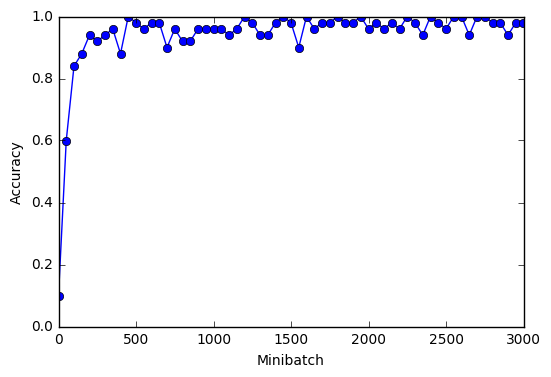

Model saved in file: /tmp/my_mnist_model.ckpt
test accuracy: 0.983300030231
CPU times: user 18.3 s, sys: 2.13 s, total: 20.4 s
Wall time: 11.5 s


In [38]:
%%time

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver()

MINIBATCH_SIZE = 50
STEPS = 3000

# added three lines here to provide plooting at the end
plt.axis([0, STEPS, 0, 1])
plt_bat = []
plt_acc = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(STEPS):
        batch = mnist.train.next_batch(MINIBATCH_SIZE)
        if i % MINIBATCH_SIZE == 0:
            
            train_accuracy = sess.run(accuracy, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))
            # added two lines to allow plotting the accuracy at the end
            plt_bat.append(i)
            plt_acc.append(train_accuracy)      
        
        ##### EDIT keep_prob HERE.  Try values between 0.0 and 1.0
        sess.run(train_step, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        ##### DONT EDIT BELOW THIS LINE

    X = mnist.test.images.reshape(10, 1000, 784)
    Y = mnist.test.labels.reshape(10, 1000, 10)
    plt_bat.append(i)
    plt_acc.append(train_accuracy)
    #plt.scatter(plt_bat, plt_acc)   
    plt.xlabel('Minibatch')
    plt.ylabel('Accuracy')
    plt.plot(plt_bat, plt_acc, '-o')  
    plt.show()
    test_accuracy = np.mean([sess.run(accuracy, feed_dict={x:X[i], y_:Y[i], keep_prob:1.0}) for i in range(10)])
    
    LEFT_OFF = i
    # Save model weights to disk
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)
    
print("test accuracy: {}".format(test_accuracy))


# Inference Only
Here we use out test set to see how well our model generalizes to examples it has not seen before.

In [39]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Restore model weights from previously saved model
    saver.restore(sess, model_path)
    print("Model restored from file: %s" % save_path)

    X = mnist.test.images.reshape(10, 1000, 784)
    Y = mnist.test.labels.reshape(10, 1000, 10)
    %time
    test_accuracy = np.mean([sess.run(accuracy, feed_dict={x:X[i], y_:Y[i], keep_prob:1.0}) for i in range(10)])
    
print("test accuracy: {}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from /tmp/my_mnist_model.ckpt
Model restored from file: /tmp/my_mnist_model.ckpt
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 31.9 µs
test accuracy: 0.983300030231


## Score Single Example 

Exercise : Try to classify a couple of different images.  See if you can output the number of the image.



In [40]:
# Execute this block of helper functions
def plot_image(image_number) :
    plt.imshow(mnist.test.images[image_number].reshape((28, 28)),cmap='gray')
    plt.ylabel('some numbers')
    plt.show()
    
# Takes an image number in, and returns a numpy array of classification predictions
def predict_value(image_number) : 
    # select a single image for classification
    X = mnist.test.images[image_number].reshape((1,784))
    Y = mnist.test.labels[image_number].reshape((1,10))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        # Restore model weights from previously saved model
        saver.restore(sess, model_path)
        print("Model restored from file: %s" % save_path)
    
        test_res = sess.run(y_conv, feed_dict={x:X, y_:Y, keep_prob:1.0}) 
        
    print("test accuracy: {}".format(test_res))
    return test_res

1. Select an image to Start

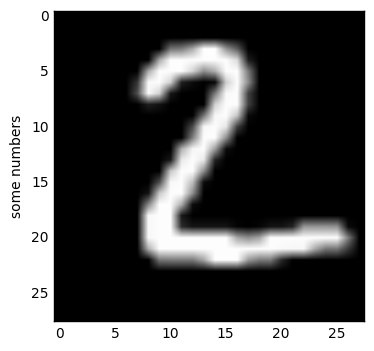

In [41]:
## Edit this line : Select a random image and plot.  Change the value of image number to something between 0-500
# try image number 8 .. might be interesting to see what the classifer chose
image_number = 1
## Do not edit below this line

plot_image(image_number)

2. Now lets inspect the values returned.  Each value contains the classification value for each number.  

In [43]:
predict_value(image_number)

INFO:tensorflow:Restoring parameters from /tmp/my_mnist_model.ckpt
Model restored from file: /tmp/my_mnist_model.ckpt
test accuracy: [[  3.6143713    3.3968904   15.49932861   0.65284181  -3.52605057
   -7.0658474   -1.55236113  -5.83738375   1.27920938  -3.88019967]]


array([[  3.6143713 ,   3.3968904 ,  15.49932861,   0.65284181,
         -3.52605057,  -7.0658474 ,  -1.55236113,  -5.83738375,
          1.27920938,  -3.88019967]], dtype=float32)

3. Use the argmax function to determine the index of the maximum value in the array.  This index will correspond to the number in the picture.


 <div class="panel-group" id="accordion-31">

  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse1-31">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-31" class="panel-collapse collapse">
      <div class="panel-body">use the np.argmax function  </div>
    </div>
  </div>
  
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-31" href="#collapse1-32">
        Answer </a>
      </h4>
    </div>
    <div id="collapse1-32" class="panel-collapse collapse">
      <div class="panel-body">np.argmax(predict_value(image_number))</div>
    </div>
  </div>
  
</div>   





### Summary
Congratulations, you just run through a CNN use case using tensorflow!

In this example you learned about the structure of a CNN, a couple details about the nomenclature of tensorflow, and saw how you can use tensorflow to classify images.  